# GUN CRIME DATA FROM 15 FILES RANGING FROM 2006-2020

In [1]:
# Importing of Possible Libraries i will be using

import numpy as np                   # 2D arrays
import matplotlib.pyplot as plt       # for data visualisation
import pandas as pd                   # reading csv file and turning to dataframe
import seaborn as sns                 # for Data visualisation
import glob
import folium
import re
import matplotlib.pyplot as plt
from dateutil.parser import parse
from datetime import datetime
from shapely.geometry import Point
import geopandas as gpd
import calendar # Add this line to import the calendar module

In [2]:
# Importing CSV File 1 - 15 
# Years of files are from 2006-2020
data1 = pd.read_csv(r"C:\Users\micha\Downloads\archive (11)\guns_2006.csv")
data2 = pd.read_csv(r"C:\Users\micha\Downloads\archive (11)\guns_2007.csv")
data3 = pd.read_csv(r"C:\Users\micha\Downloads\archive (11)\guns_2008.csv")
data4 = pd.read_csv(r"C:\Users\micha\Downloads\archive (11)\guns_2009.csv")
data5 = pd.read_csv(r"C:\Users\micha\Downloads\archive (11)\guns_2010.csv")
data6 = pd.read_csv(r"C:\Users\micha\Downloads\archive (11)\guns_2011.csv")
data7 = pd.read_csv(r"C:\Users\micha\Downloads\archive (11)\guns_2012.csv")
data8 = pd.read_csv(r"C:\Users\micha\Downloads\archive (11)\guns_2013.csv")
data9 = pd.read_csv(r"C:\Users\micha\Downloads\archive (11)\guns_2014.csv")
data10 = pd.read_csv(r"C:\Users\micha\Downloads\archive (11)\guns_2015.csv")
data11 = pd.read_csv(r"C:\Users\micha\Downloads\archive (11)\guns_2016.csv")
data12 = pd.read_csv(r"C:\Users\micha\Downloads\archive (11)\guns_2017.csv")
data13 = pd.read_csv(r"C:\Users\micha\Downloads\archive (11)\guns_2018.csv")
data14 = pd.read_csv(r"C:\Users\micha\Downloads\archive (11)\guns_2019.csv")
data15 = pd.read_csv(r"C:\Users\micha\Downloads\archive (11)\guns_2020.csv")

In [3]:
# Merging the CSV files into one DataFrame
merged_data = pd.concat([data1, data2, data3, data4, data5, data6, data7, data8, data9, data10,
                         data11, data12, data13, data14, data15], ignore_index=True)


In [4]:
# Saving the merged data to a new CSV file & Renaming as Gun_Crimes 
merged_data.to_csv(r"C:\Users\micha\Downloads\archive (11)\guns_merged.csv", index=False)
Gun_Crimes = merged_data
Gun_Crimes.head()

,year,month,intent,police,sex,age,race,hispanic,place,education
0,2006,1,Suicide,0,M,81.0,White,100,Home,HS/GED
1,2006,1,Homicide,0,M,55.0,White,100,Other unspecified,Less than HS
2,2006,1,Homicide,0,M,19.0,Black,100,Home,Less than HS
3,2006,1,Homicide,0,M,33.0,Black,100,Other unspecified,Less than HS
4,2006,1,Homicide,0,M,23.0,Black,100,Home,Less than HS


In [5]:
# Displaying last 5 Rows of Data
Gun_Crimes.tail()

,year,month,intent,police,sex,age,race,hispanic,place,education
529228,2020,12,Suicide,0,M,35.0,Hispanic,275,Home,Some college
529229,2020,12,Homicide,0,M,34.0,Black,100,Street,HS/GED
529230,2020,12,Homicide,0,M,26.0,Black,100,Street,HS/GED
529231,2020,12,Homicide,0,M,24.0,Black,100,Trade/service area,HS/GED
529232,2020,12,Homicide,1,M,18.0,Hispanic,299,NaN,HS/GED


In [6]:
# Displaying Info of Data
Gun_Crimes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 529233 entries, 0 to 529232
Data columns (total 10 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   year       529233 non-null  int64  
 1   month      529233 non-null  int64  
 2   intent     529206 non-null  object 
 3   police     529233 non-null  int64  
 4   sex        529233 non-null  object 
 5   age        529156 non-null  float64
 6   race       529233 non-null  object 
 7   hispanic   529233 non-null  int64  
 8   place      522573 non-null  object 
 9   education  516025 non-null  object 
dtypes: float64(1), int64(4), object(5)
memory usage: 40.4+ MB


In [7]:
# DataFrame Layout
Gun_Crimes.shape

(529233, 10)

In [8]:
# Displaying Column Names
Gun_Crimes.columns

Index(['year', 'month', 'intent', 'police', 'sex', 'age', 'race', 'hispanic',
       'place', 'education'],
      dtype='object')

In [9]:
Gun_Crimes.isnull()

,year,month,intent,police,sex,age,race,hispanic,place,education
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
529228,False,False,False,False,False,False,False,False,False,False
529229,False,False,False,False,False,False,False,False,False,False
529230,False,False,False,False,False,False,False,False,False,False
529231,False,False,False,False,False,False,False,False,False,False


In [10]:
# Checking for Duplicated Rows
Gun_Crimes.duplicated().sum()

200751

In [11]:
# Removing Duplicated Rows
Gun_Crimes.drop_duplicates()

,year,month,intent,police,sex,age,race,hispanic,place,education
0,2006,1,Suicide,0,M,81.0,White,100,Home,HS/GED
1,2006,1,Homicide,0,M,55.0,White,100,Other unspecified,Less than HS
2,2006,1,Homicide,0,M,19.0,Black,100,Home,Less than HS
3,2006,1,Homicide,0,M,33.0,Black,100,Other unspecified,Less than HS
4,2006,1,Homicide,0,M,23.0,Black,100,Home,Less than HS
...,...,...,...,...,...,...,...,...,...,...
529223,2020,12,Suicide,0,F,34.0,White,100,Home,BA+
529224,2020,12,Homicide,0,F,54.0,Black,100,Home,HS/GED
529225,2020,12,Homicide,0,M,32.0,Hispanic,260,Trade/service area,HS/GED
529228,2020,12,Suicide,0,M,35.0,Hispanic,275,Home,Some college


In [12]:
# filling in the missing Values
Gun_Crimes.fillna("Unknown", inplace=True)

In [13]:
# Checking NaN values if any.
Gun_Crimes.isna().sum()

year         0
month        0
intent       0
police       0
sex          0
age          0
race         0
hispanic     0
place        0
education    0
dtype: int64

In [14]:
# Grouping the data by year and counting the number of incidents
gun_crime_counts = Gun_Crimes.groupby('year').size()

# Printing the number of incidents per year
print(f" The Amount of recorded Crimes Per Year are as followed for the {gun_crime_counts}")

 The Amount of recorded Crimes Per Year are as followed for the year
2006    30896
2007    31224
2008    31593
2009    31347
2010    31672
2011    32351
2012    33563
2013    33636
2014    33599
2015    36252
2016    38658
2017    39773
2018    39740
2019    39707
2020    45222
dtype: int64


# Number of Gun Crimes Reported per Year

In [15]:
# Calculating the total number of incidents
total_incidents = gun_crime_counts.sum()
print("Total number of gun crimes:", total_incidents)

Total number of gun crimes: 529233


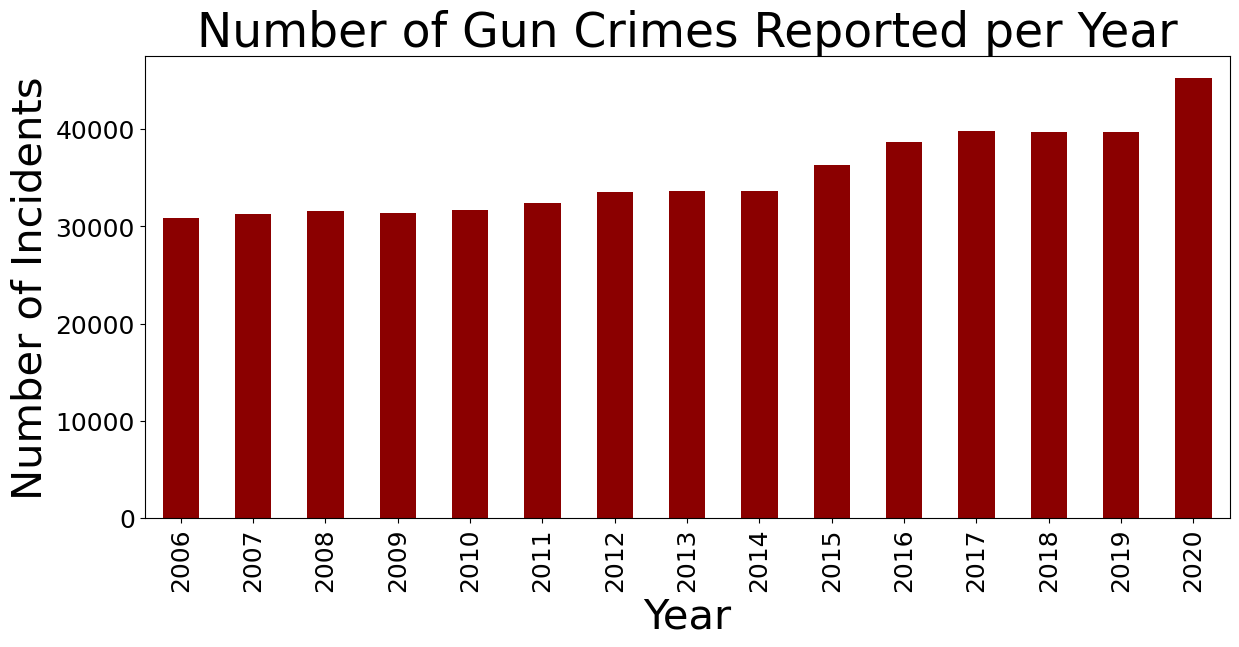

In [16]:
# Plotting the number of gun crimes per year
plt.figure(figsize=(14, 6))
gun_crime_counts.plot(kind='bar', color="darkred")
plt.title('Number of Gun Crimes Reported per Year', fontsize=34)
plt.xlabel('Year', fontsize=30)
plt.ylabel('Number of Incidents', fontsize=30)
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
plt.show()

# Number of Gun Crimes Reported per Month

In [17]:
# Grouping the data by month and counting the number of incidents
gun_crime_counts_monthly = Gun_Crimes.groupby('month').size()

# Printing the number of incidents per month
print(gun_crime_counts_monthly)

month
1     43374
2     37597
3     43293
4     43549
5     45414
6     45310
7     48156
8     46397
9     44588
10    45011
11    42999
12    43545
dtype: int64


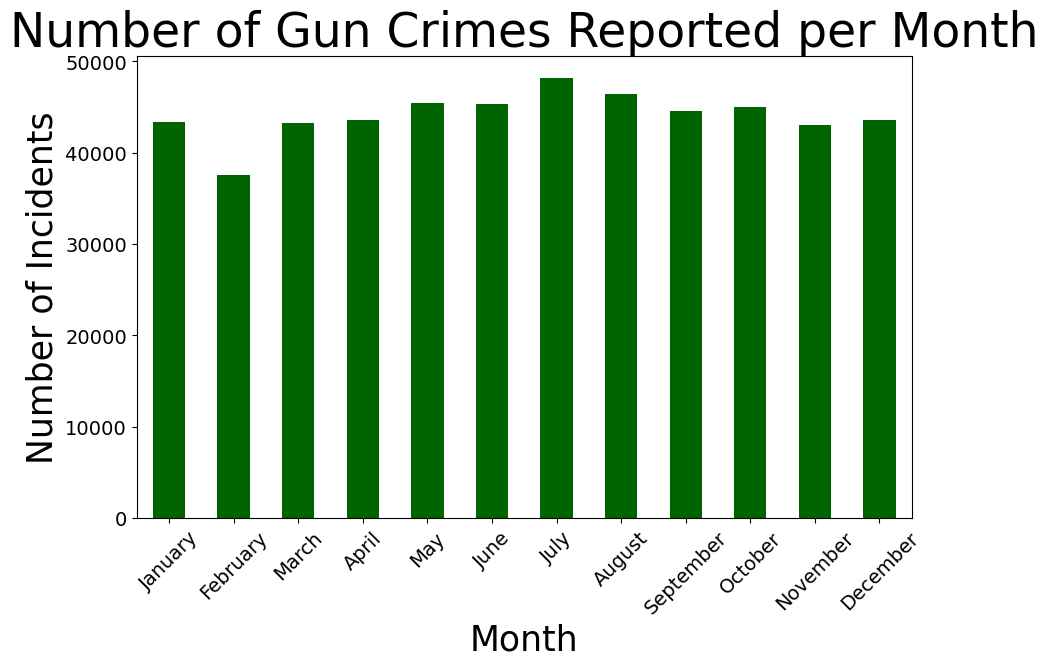

In [18]:
# Creating a list of month names
month_names = [calendar.month_name[i] for i in range(1, 13)]

# Plotting the number of gun crimes per month
plt.figure(figsize=(10, 6))
gun_crime_counts_monthly.plot(kind='bar', color="darkgreen")
plt.title('Number of Gun Crimes Reported per Month', fontsize=34)
plt.xlabel('Month', fontsize=25)
plt.ylabel('Number of Incidents', fontsize=25)
plt.xticks(range(12), month_names, rotation=45)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.show()

# Distribution of Gun Crime Intents

In [19]:
# Counting the number of incidents for each intent
intent_counts = Gun_Crimes['intent'].value_counts()

# Printing the intent counts
print(intent_counts)

Suicide         315225
Homicide        201468
Accidental        8186
Undetermined      4327
Unknown             27
Name: intent, dtype: int64


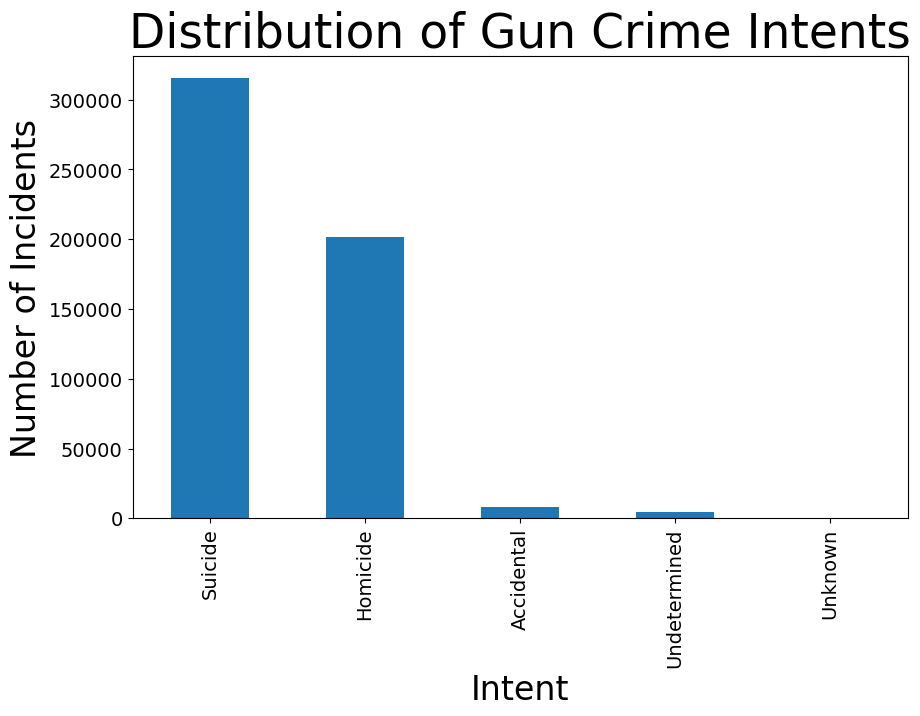

In [20]:
# Plotting the intent distribution
plt.figure(figsize=(10, 6))
intent_counts.plot(kind='bar')
plt.title('Distribution of Gun Crime Intents', fontsize=34)
plt.xlabel('Intent', fontsize=24)
plt.ylabel('Number of Incidents', fontsize=24)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.show()

In [21]:
# Counting the number of incidents for each demographic category
age_counts = Gun_Crimes['age'].value_counts()
gender_counts = Gun_Crimes['sex'].value_counts()
race_counts = Gun_Crimes['race'].value_counts()
education_counts = Gun_Crimes['education'].value_counts()

In [22]:
# Printing the demographic counts
print("Age distribution:")
print(age_counts)
print("\nGender distribution:")
print(gender_counts)
print("\nRace distribution:")
print(race_counts)
print("\nEducation distribution:")
print(education_counts)

Age distribution:
22.0     13673
21.0     13536
23.0     13479
24.0     13019
25.0     12772
         ...  
109.0        1
104.0        1
107.0        1
105.0        1
106.0        1
Name: age, Length: 110, dtype: int64

Gender distribution:
M    454524
F     74709
Name: sex, dtype: int64

Race distribution:
White                             331168
Black                             133240
Hispanic                           52457
Asian/Pacific Islander              7382
Native American/Native Alaskan      4986
Name: race, dtype: int64

Education distribution:
HS/GED          226373
Less than HS    119411
Some college    107123
BA+              63118
Unknown          13208
Name: education, dtype: int64


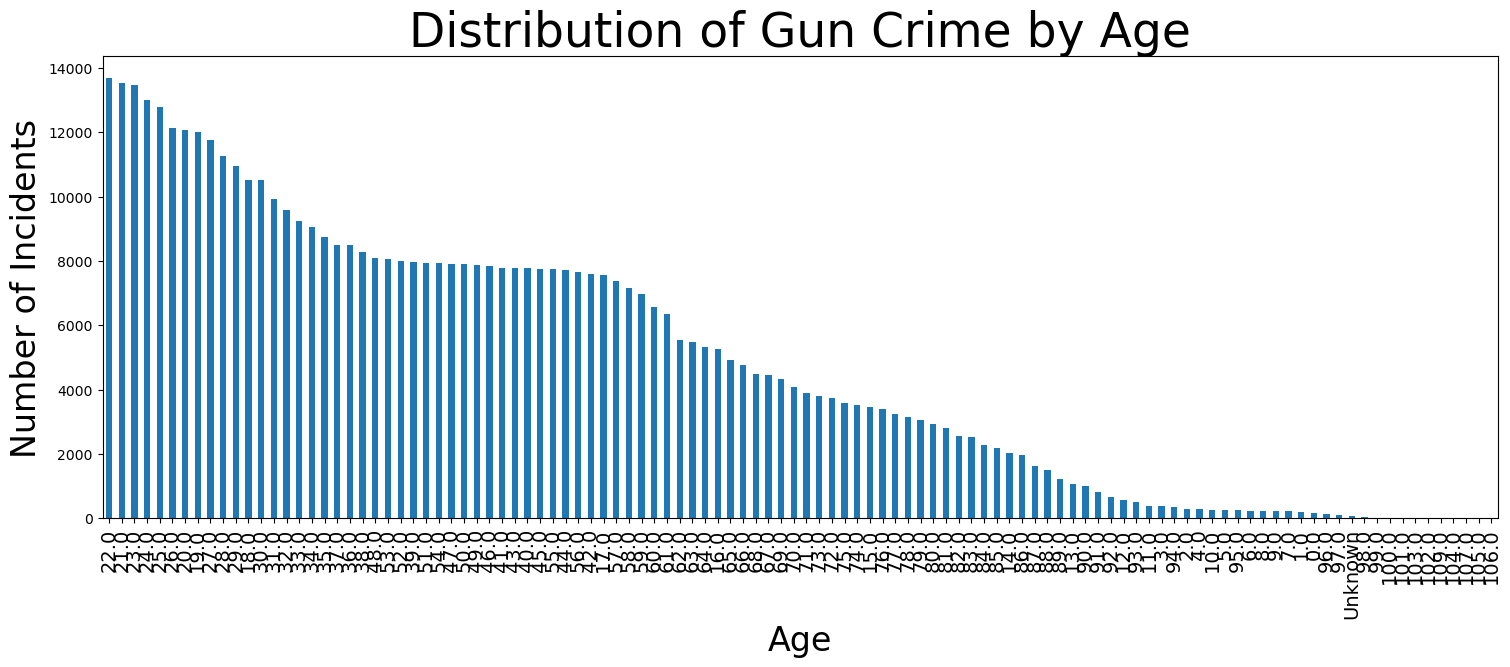

In [23]:
# Plotting the age distribution
plt.figure(figsize=(18, 6))
age_counts.plot(kind='bar')
plt.title('Distribution of Gun Crime by Age', fontsize=34)
plt.xlabel('Age', fontsize=24)
plt.ylabel('Number of Incidents', fontsize=24)
plt.yticks(fontsize=10)
plt.xticks(fontsize=14)
plt.show()


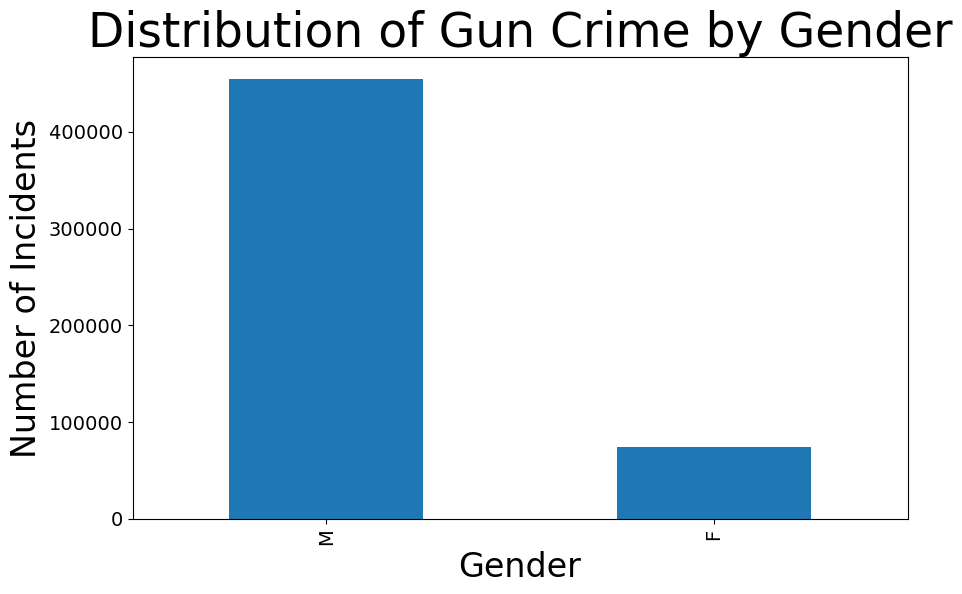

In [24]:
# Plotting the gender distribution
plt.figure(figsize=(10, 6))
gender_counts.plot(kind='bar')
plt.title('Distribution of Gun Crime by Gender', fontsize=34)
plt.xlabel('Gender', fontsize=24)
plt.ylabel('Number of Incidents', fontsize=24)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.show()

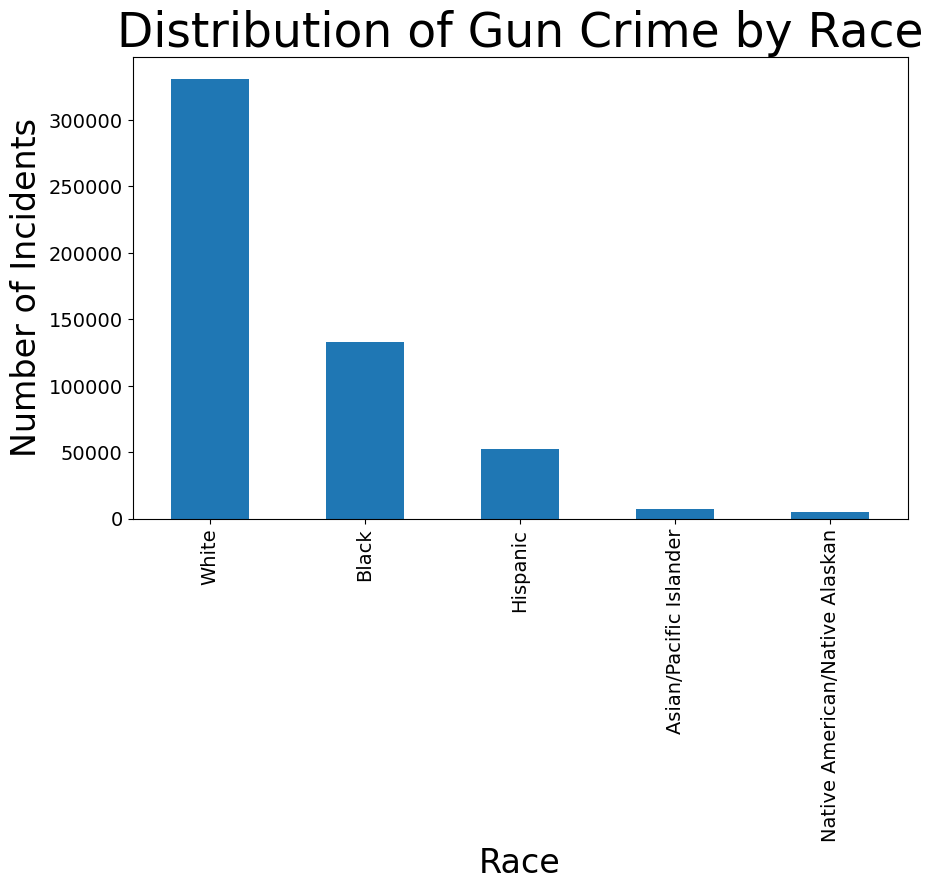

In [25]:
# Plotting the race distribution
plt.figure(figsize=(10, 6))
race_counts.plot(kind='bar')
plt.title('Distribution of Gun Crime by Race', fontsize=34)
plt.xlabel('Race', fontsize=24)
plt.ylabel('Number of Incidents', fontsize=24)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.show()

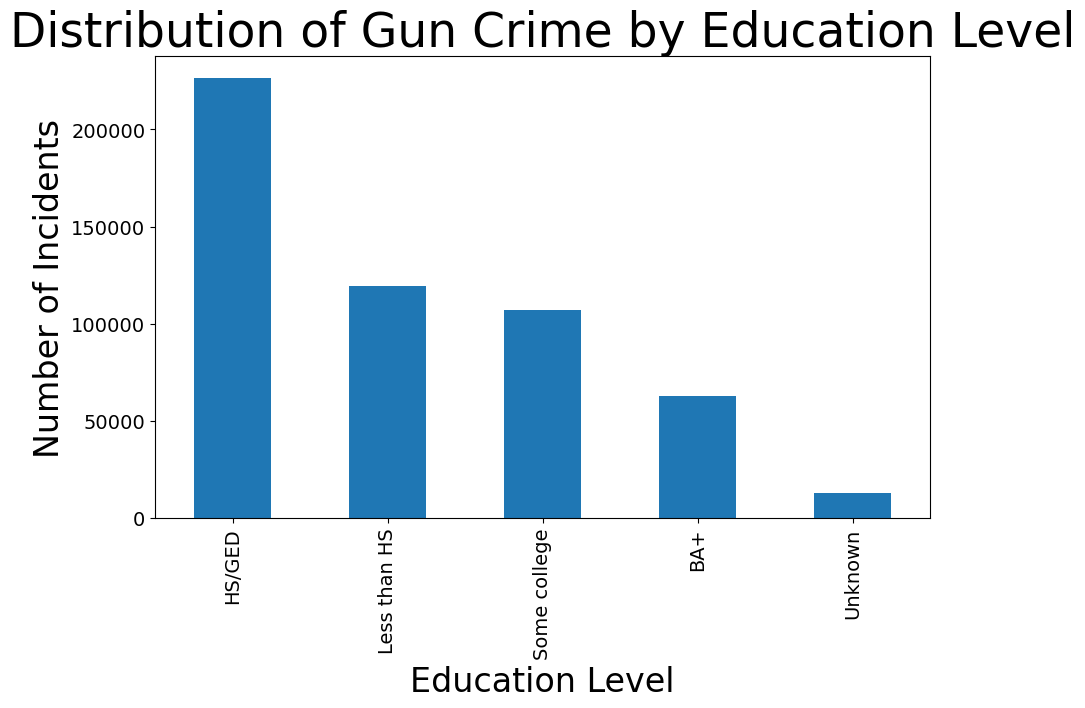

In [26]:
# Plotting the education distribution
plt.figure(figsize=(10, 6))
education_counts.plot(kind='bar')
plt.title('Distribution of Gun Crime by Education Level', fontsize=34)
plt.xlabel('Education Level', fontsize=24)
plt.ylabel('Number of Incidents', fontsize=24)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.show()

# Distribution of Gun Crimes by Location

In [27]:
# Counting the number of incidents by location
location_counts = Gun_Crimes['place'].value_counts()

# Printing the location counts
print(location_counts)

Home                       295079
Other specified             72357
Other unspecified           67542
Street                      60779
Trade/service area          17838
Unknown                      6660
School/instiution            3245
Farm                         2337
Industrial/construction      1376
Residential institution      1344
Sports                        676
Name: place, dtype: int64


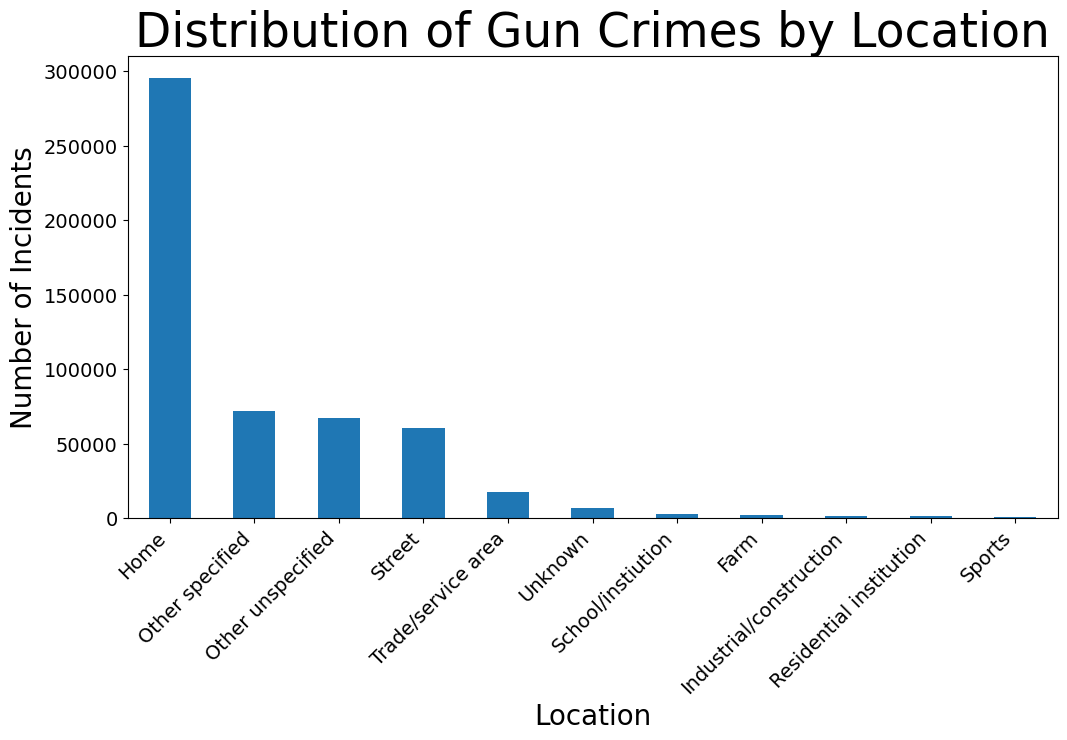

In [28]:
# Plotting the location-based distribution
plt.figure(figsize=(12, 6))
location_counts.plot(kind='bar')
plt.title('Distribution of Gun Crimes by Location', fontsize=34)
plt.xlabel('Location', fontsize=20)
plt.ylabel('Number of Incidents', fontsize=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.show()

# Distribution of Gun Crimes by Education Level

In [29]:
# Counting the number of incidents for each education level
education_counts = Gun_Crimes['education'].value_counts()

# Printing the education level counts
print(education_counts)

HS/GED          226373
Less than HS    119411
Some college    107123
BA+              63118
Unknown          13208
Name: education, dtype: int64


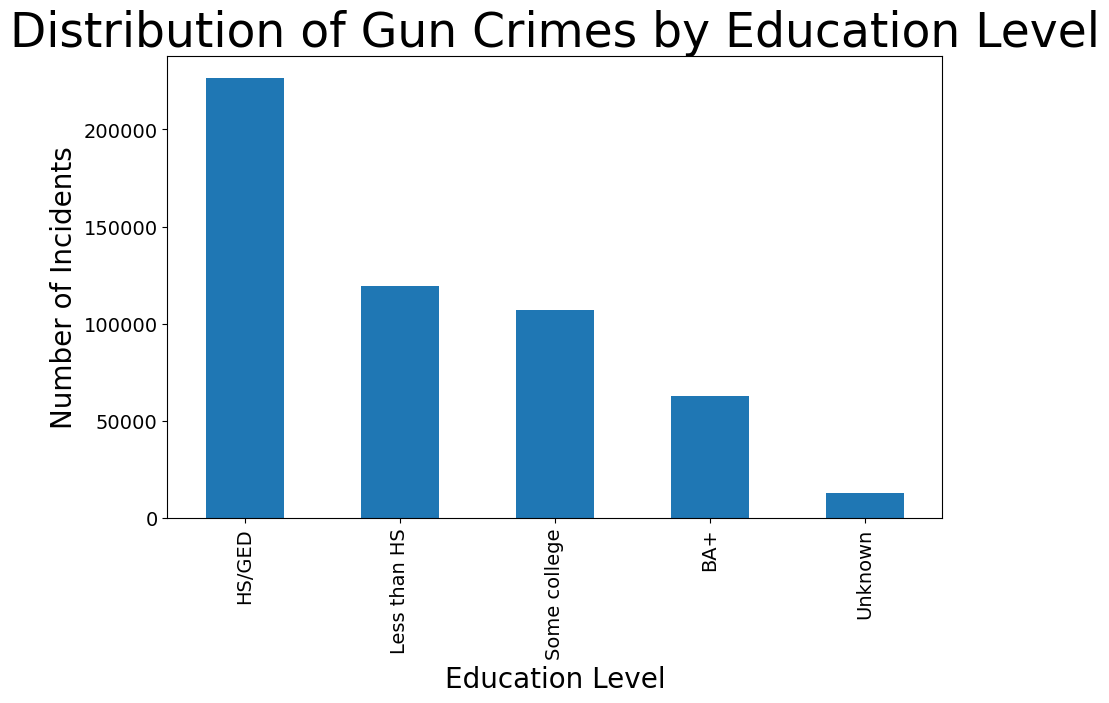

In [30]:
# Plotting the education level distribution
plt.figure(figsize=(10, 6))
education_counts.plot(kind='bar')
plt.title('Distribution of Gun Crimes by Education Level', fontsize=34)
plt.xlabel('Education Level', fontsize=20)
plt.ylabel('Number of Incidents', fontsize=20)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.show()